# Project_2020-Fundamentals-of-Data-Analysis
***
## 1) Project Instructions
***
In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## 2) Research

***
### 2.1) What is simple linear regression?
In statistics regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change [1].

Simple linear regression is a method that's used for multivariate data (two or more variables). For this project it'll be used to study the relationship between two continuos variables. For now consier these variables 'x' and 'y' [2].

- 'x' is regarded as the predictor, explanatory, or independent variable.
- 'y' is regarded as the the response, outcome, or dependent variable.

With simple linear regression there are two types of relationships;

- Deterministic
- Statistical

#### *2.1.1) Deterministc relationship*

Deterministic is when the relationship between the two variables is perfectly described by an equation [2]. Ohms law is a good example of this type of relationship. A picture paints a thousand words so refer to Figure 1 for a scatter plot of Ohm's law. 

For the scatter plot in Figure 1 there are 200 values between 0 and 20 randomly generated using the randint function from NumPy [3]. These values represent the current (I). The resistance (R) is the constant (slope of the line) which is 4 ohms. The voltage is directly proportional to the current, showing this to be a deterministic relationship.

$$Ohms Law: V = I x R$$

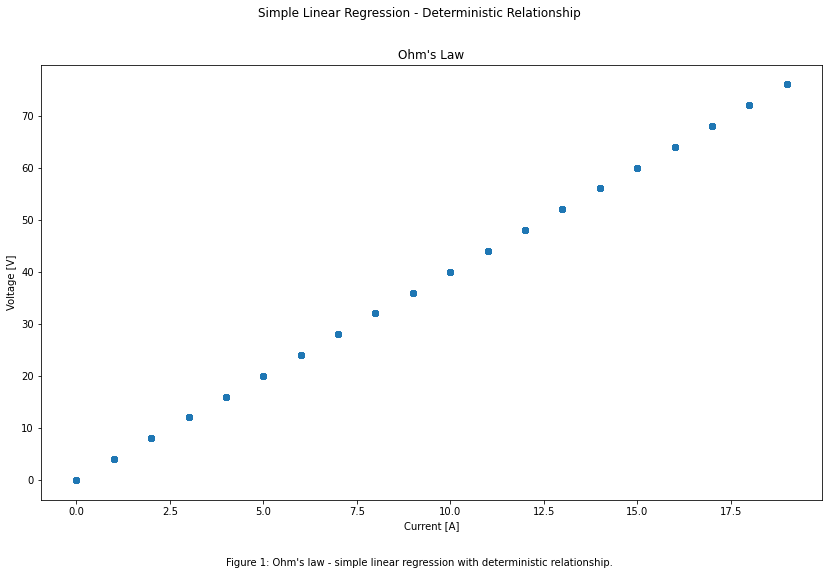

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#I = current
#R = resistance
#V = applied voltage
I = np.random.randint(0,20, size = 200)

R = 4
V = I*R

plt.figure(figsize=(14, 8))
plt.scatter(I, V,)
plt.title("Ohm's Law")
plt.suptitle("Simple Linear Regression - Deterministic Relationship")
plt.xlabel("Current [A]", color = "black")
plt.ylabel("Voltage [V]", color = "black")
txt="Figure 1: Ohm's law - simple linear regression with deterministic relationship."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

From Figure 1 it can be seen that the relationship between current and voltage is perfect, evident by the perfectly straight line. The equation for a straight line is:
$$ y = mx + C$$

Also of interest here is the similarity between the straight line equation and the Ohm's Law equation: $ y = mx$ (with intercept at 0) and $V = IR+0$.

where:
- y = V = voltage
- m = R = resistance
- x = I = current
- C = 0 = intercept

That concludes the discussion on deterministic relationships. For this project the focus will be on statistical simple linear regression where there is no perfect relationship between the variables.

#### *2.1.2) Statistical Simple Linear Regression*
With statistical simple linear regression the relationship between the variables is not perfect. A good example of a statistical simple linear regression is the relationship between height and weight. Refer to Figure 2 for a scatter plot of height vs weight, it can be seen that there is a positive correlation but it's not a perfect relationship like the deterministic example in Figure 1.

In [2]:
from numpy import genfromtxt
whdf = genfromtxt('weight-height.csv', delimiter=',')
#print the number of columns in the array
print('The shape of the numpy array is (rows, columns):' )
print(np.shape(whdf))
print()

#take a look at the array to see which columns height and weight are stored
print(whdf)
print()
print('Height and weight are stored in the second and third columns in the array:' )

The shape of the numpy array is (rows, columns):
(5001, 3)

[[         nan          nan          nan]
 [         nan  73.84701702 241.8935632 ]
 [         nan  68.78190405 162.3104725 ]
 ...
 [         nan  67.01379497 199.1954001 ]
 [         nan  71.55771849 185.9059095 ]
 [         nan  70.35187988 198.9030119 ]]

Height and weight are stored in the second and third columns in the array:


From the 'print(np.shape(whdf))' command above it can be seen that there are 5001 rows and 3 columns in the numpy array. Then using the 'print(whdf)' command it can be seen that the height and weight are stored in column 2 and 3, which in terms of the array are positions 1 and 2. The column location for the variables of interest is required to plot a scatter plot in order to study the relationship between these variables;

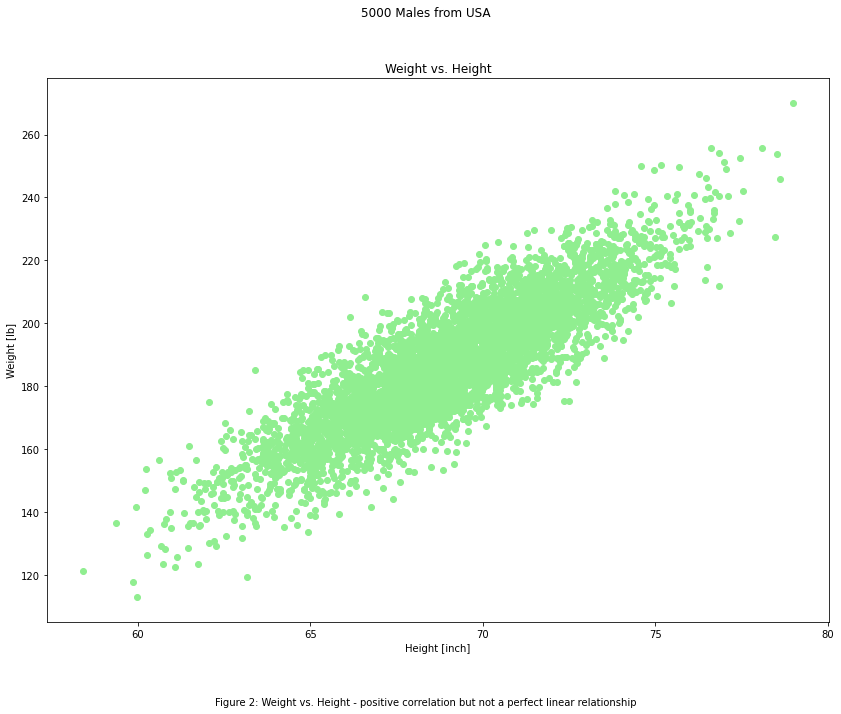

In [3]:
plt.figure(figsize=(14,10))
plt.scatter((whdf[:,1]), (whdf[:,2]), color = 'lightgreen')
plt.title("Weight vs. Height")
plt.suptitle("5000 Males from USA")
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 2: Weight vs. Height - positive correlation but not a perfect linear relationship"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

From Figure 2 it can be seen that there is a positive correlation between height and weight, however it is also evident that this is not a perfect linear relationship. This is an example of where statistical simple linear regression comes into play where a line of best fit can be fitted to the data. The difference between 'deterministic' and 'statistical' simple linear regression is presented in side by side scatter plots in Figure 3.

With reference to statistical simple linear regression the obvious question is, how good is the fit, how good does it need to be, how is it calculated etc.. This leads into the next section of this project where the workings of statistical simple linear regression is researched.

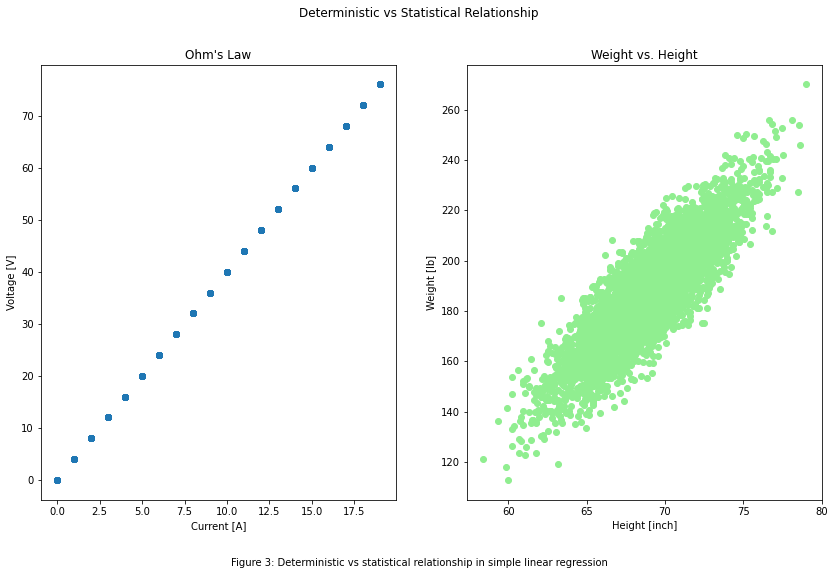

In [4]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.scatter(I, V,)
plt.title("Ohm's Law")
plt.suptitle("Simple Linear Regression - Deterministic Relationship")
plt.xlabel("Current [A]", color = "black")
plt.ylabel("Voltage [V]", color = "black")
plt.subplot(1, 2, 2)
plt.scatter((whdf[:,1]), (whdf[:,2]), color = 'lightgreen')
plt.title("Weight vs. Height")
plt.suptitle("Deterministic vs Statistical Relationship")
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 3: Deterministic vs statistical relationship in simple linear regression"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

### 2.2) How does statistical simple linear regression work?
***
The aim of regression is to find the linear relationship between two variables. This is in turn translated into a mathematical problem of finding the equation of the line that is closest to all points observed [4] Simply put regression works by fitting a line of best fit to the data.

#### 2.2.1) How is the line of best fit determined?
On a scatter plot like Figure 2, when a line of best fit is drawn some points will lie above the line and some below. The vertical distance each point is from the line is recorded and know as deviations or errors [4]. The regression line (line of best fit) is determined by minimising the sum total of the squares of the deviations or errors. This principle is known as the least-squares method and is commonly used to find the regression line.

#### 2.2.2) Important considerations
The first step is to look carefully at the data:
1. Is there an upwards/downwards trend in the data or could a horizontal line be fit though the data?
2. Is the trend linear or curvilinear?
3. Is there constant variance along the regression line or does it systematically change as the predictor variable changes? [5]

#### 2.2.3) Assumptions for statistical simple linear regression
Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are:
- Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.
- Independence of observations: the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.
- Normality: The data follows a normal distribution.
- The relationship between the independent and dependent variable is linear: the line of best fit through the data points is a straight line (rather than a curve or some sort of grouping factor).[1]

## 3) Development
***
The goal of this project is to accurately predict wind turbine power output from wind speed values using the data set as a basis. As called out previously the methodology when starting to analyse any new problem is to look carefully at the data and check;

1. Is there an upwards/downwards trend in the data or could a horizontal line be fit though the data?
2. Is the trend linear or curvilinear?
3. Is there constant variance along the regression line or does it systematically change as the predictor variable changes? [5]

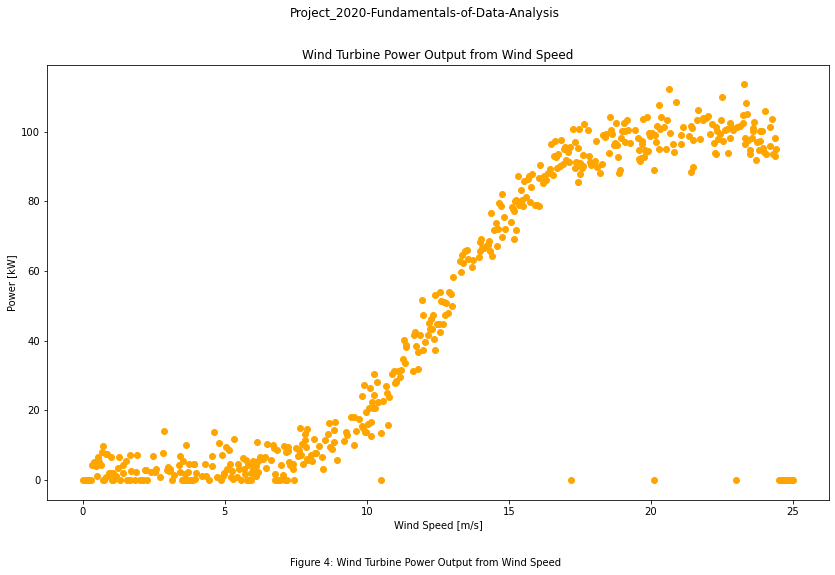

In [5]:
df = pd.read_csv('powerproduction.csv')
power = df['power']
speed = df['speed']

plt.figure(figsize=(14,8))
plt.scatter(speed, power, color = 'orange')
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
txt="Figure 4: Wind Turbine Power Output from Wind Speed"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

With reference to Figure 4 it can be seen that the power production data set exhibits the following:

1. Upward trend in the data.
2. Curvilinear trend.
3. Constant variance.

Given the fact that the power production data set has a curvlinear trend it has been decided to park this data set for now. It has been decided to start by analysing a data set that has a linear trend first. The height vs weight data set from Figure 2 has a linear trend so this data set will be analysed first. Refer to Figure 5 for side by side scatter plots of curvlinear and linear trending data. 

*__Note__: The power production data set is analysed as a curvelinear data set in this report after the height vs weight linear data set is analysed. The thought process here was to deal with a simple linear data set before moving to a more complex data set.*

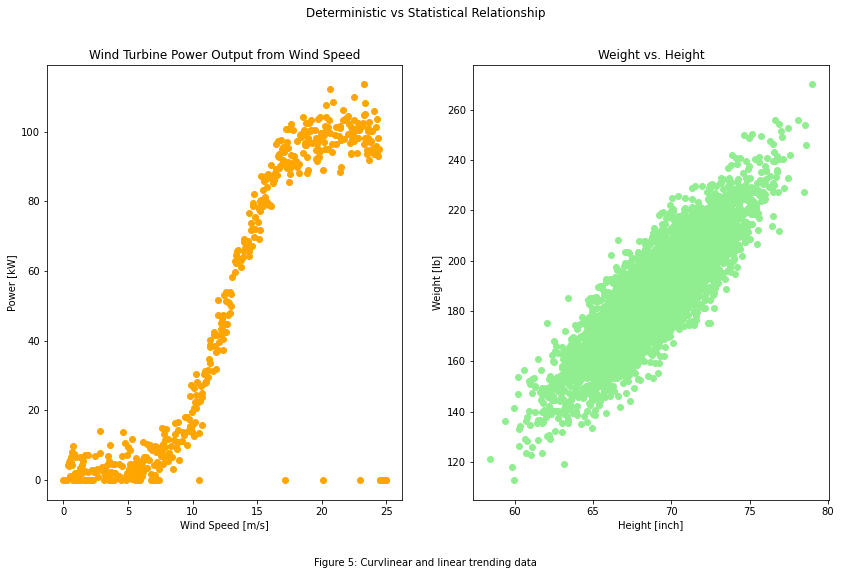

In [6]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.scatter(speed, power, color = 'orange')
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
plt.subplot(1, 2, 2)
plt.scatter((whdf[:,1]), (whdf[:,2]), color = 'lightgreen')
plt.title("Weight vs. Height")
plt.suptitle("Deterministic vs Statistical Relationship")
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 5: Curvlinear and linear trending data"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

### 3.1) Analysis of height vs weight data set - simple linear regression

With reference to Figure 5 it can be seen that the height vs weight data set exhibits the following;

1. Upward trend in the data.
2. linear trend.
3. Constant variance.

The next step is to build a model. First step is to import linear_model from sklearn. The linear_model are a set of methods intended for regression in which the target value is expected to be a linear combination [6]. After that the steps are to set up a pandas dataframe, then fit a line to the data set [7]. With the line of best fit the model is ready to make predictions of weight based on height. Also included below are the coefficient, the intercept and the r-squared value [8]. 

Along with the linear_model.LinearRegression() method, np.polyfit is also included below. Both methods result in the same values for the coefficient and the intercept. Using both methods increase confidence in the results which is good when doing this type of analysis for the first time.

In [7]:
from sklearn import linear_model
import pandas as pd
df2 = pd.read_csv('weight-height.csv')
reg = linear_model.LinearRegression()
reg.fit = reg.fit(df2[['Height']],df2.Weight)
print('Coefficient:',reg.coef_)
print('Intercept:',reg.intercept_)

Coefficient: [5.96177381]
Intercept: -224.49884070650657


In [8]:
reg2 = np.polyfit(df2['Height'], df2['Weight'], 1)
reg2

array([   5.96177381, -224.49884071])

The next step is to apply a line of best fit to the height vs weight data. The straight line equation can now be defined using the information from above;

- m (Coefficient) = 5.96177
- C (Intercept) = -224.49884

Straight line equation: $y = 5.96177(x) + (-224.49884)$

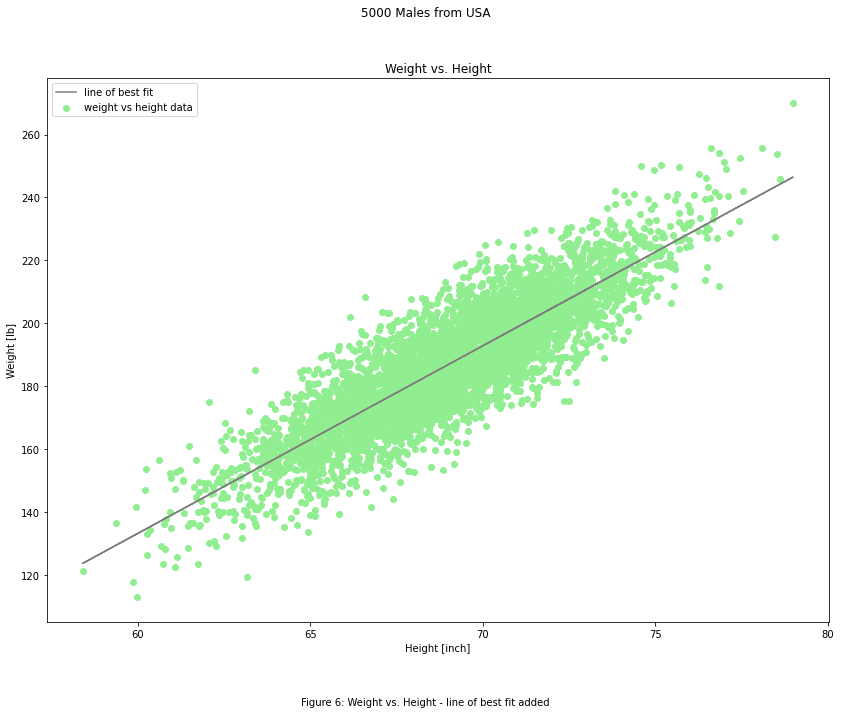

In [9]:
C = -224.49884 #(Intercept)
m = 5.96177 #(Coefficient)
x = df2['Height']
y = m * x + C

plt.figure(figsize=(14,10))
plt.scatter((whdf[:,1]), (whdf[:,2]), color = 'lightgreen', label = 'weight vs height data')
plt.plot(x,y, color = 'grey', label = 'line of best fit')
plt.title("Weight vs. Height")
plt.suptitle("5000 Males from USA")
plt.legend()
plt.xlabel("Height [inch]", color = "black")
plt.ylabel("Weight [lb]", color = "black")
txt="Figure 6: Weight vs. Height - line of best fit added"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### 3.1.1) Line of best fit  - weight vs height
From Figure 6 it can be seen that a line of best fit has been added to the weight vs height data. It is evident that the there is some spread within the data set. The obvious question is, how well does this line fit the data. Is there a quantitative method to describe the fit. The answer is yes, the R squared value.

#### 3.1.2) R-squared value - weight vs height
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale [10]. The R-squared value is calculated for the weight vs height data set in the following code. 

Also included in the following code is a prediction for weight based on a height using the model. With this line of code a height is entered, in the example below 70 is entered and the output is the predicted weight for that height, in the wxampl below the weight is 192.83.

In [10]:
print('R-squared:', reg.score(df2[['Height']],df2.Weight))
print('Weight:',reg.predict([[70]]))

R-squared: 0.7447324931572783
Weight: [192.82532614]


The R-squared value for the weight vs height data set is 0.7447 or 74.47%. The obvious question is whether this R-squared value is 'good'. This is a very subjective topic and depends on many factors.

The question is often asked: "what's a good value for R-squared?" or “how big does R-squared need to be for the regression model to be valid?”  Sometimes the claim is even made: "a model is not useful unless its R-squared is at least x", where x may be some fraction greater than 50%.  The correct response to this question is polite laughter followed by: "That depends!" [11].

Also consider; a high R-square of above 60%(0.60) is required for studies in the 'pure science' field because the behaviour of molecules and/or particles can be reasonably predicted to some degree of accuracy in science research; while an R-square as low as 10% is generally accepted for studies in the field of arts, humanities and social sciences because human behaviour cannot be accurately predicted, therefore, a low R-square is often not a problem in studies in the arts, humanities and social science field [12].

From the previous two paragraphs it's obvious that there's no one size fits all for what a 'good' R-squared value is. It's obvious that the closer to 1 or 100% that the model is the better it is. It's only as the value starts reducing that the question of what's an acceptable R-squared value is.

Considering the R-squared value of 74.47% for the weight vs height data along with the statement above of a 'high' R-square value being above 60% the conclusion is that this is a good model to predict weight based on height.

### 3.2) Analysis of power production data set
Having looked at, and analsed the weight vs height data the next step is to start analysis of the power production data. The plan is to;

- plot the data
- plot linear line of best fit
- define the coefficient and intercept
- define the R-squared value
- discuss the model

Then,

- plot the data
- plot polynomial line of best fit with 2 and 3 degrees of freedom
- define the coefficient and intercept
- define the R-squared value
- discuss the model

A model is developed for the powerproduction data set. The linear_model are a set of methods intended for regression in which the target value is expected to be a linear combination [6]. After that the steps are to set up a pandas dataframe, then fit a line to the data set [7]. With the line of best fit the model is ready to make predictions of power based on wind speed. Also included below are the coefficient, the intercept and the r-squared value [8]. 

Along with the linear_model.LinearRegression() method, np.polyfit is also included below. The np.polyfit() function, accepts three different input values: x, y and the polynomial degree. Arguments x and y correspond to the values of the data points that we want to fit, on the x and y axes, respectively. The third parameter specifies the degree of our polynomial function. Initially the data will be fitted with a linear fit so 1 is set as the degree to obtain the linear fit [13].

The linear_model.LinearRegression() method and the np.polyfit both result in the same values for the coefficient and the intercept. Using both methods increase confidence in the results which is good when doing this type of analysis for the first time.

In [11]:
wind_reg = linear_model.LinearRegression()
wind_reg.fit = wind_reg.fit(df[['speed']],power)
print('Coefficient:',wind_reg.coef_)
print('Intercept:',wind_reg.intercept_)

Coefficient: [4.91759567]
Intercept: -13.899902630519634


In [12]:
wind_reg2 = np.polyfit(speed, power, 1)
wind_reg2

array([  4.91759567, -13.89990263])

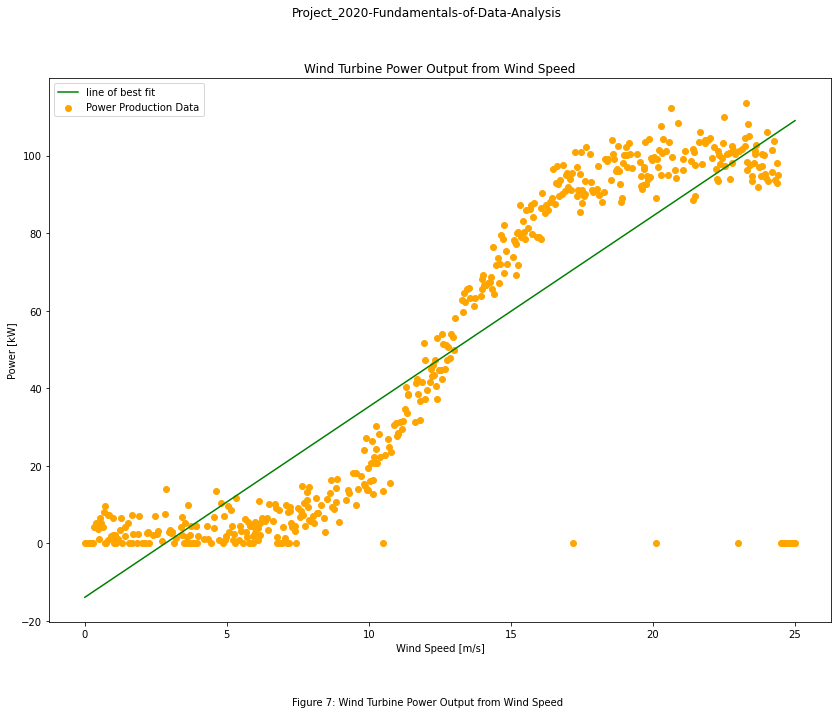

In [13]:
wind_C = -13.8999 #(Intercept)
wind_m = 4.9176 #(Coefficient)
wind_x = speed
wind_y = (wind_m * wind_x) + wind_C

plt.figure(figsize=(14,10))
plt.scatter(speed, power, color = 'orange', label = 'Power Production Data')
plt.plot(wind_x,wind_y, color = 'green', label = 'line of best fit')
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.legend()
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
txt="Figure 7: Wind Turbine Power Output from Wind Speed"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### 3.2.1) Simple linear regression, line of best fit - power_production data set
With reference to Figure 7 it can be seen that the power production data has been plotted and a simple linear regression line has been added to the data. The data exhibits some curvature so the linear line doesn't look to be ideal. Rather than making an opinion on a visual representaion it'd be better to quantify the goodness of fit. This is done using the R-squared value which is calculated in the following code along with code that predicts the power output for a given wind speed.

In [14]:
print('R-squared:', wind_reg.score(df[['speed']],df.power))

wind_speed = 17.5
predict = np.poly1d(wind_reg2)
predicted_power = predict(wind_speed)
print(f'The power output is: {predicted_power} [kW] for a wind speed of {wind_speed} [m/s]')

R-squared: 0.7289360258564073
The power output is: 72.15802151406213 [kW] for a wind speed of 17.5 [m/s]


The R-squared value and power output predictor are included in the code above. As a sanity check to the R-squared value is determined for a second time using different code but yielding the same result. These checks are done as a learning excercise as this is the first time to develop this type of code and solve this type of problem.

In [15]:
from sklearn.metrics import r2_score
r2_score(power, predict(speed))

0.7289360258564073

#### 3.2.2) Simple linear regression, R-squared value - power_production data set

From the code above, when using the wind_reg.score method to calculate the R-squared value the result was 72.89%. This seemed high as a simple linear line was added to data having curvature. To validate the R-squared value the r2_score from sklearn.metrics was also used to calculate the R-squared value. This also resulted in the same result of 72.89%.

Given the result of 72.89% this would be considered a good result, this is because earlier in the project it was stated than any result greater than 60% was 'good'. What was also mentioned previously is that there is a level of subjectivity to what qualifies as a 'good' fit. This is a good example of where having a relatively high percentage R-squared doesn't necessarily mean that the line is a good fit. 

For example if wind speed data is taken at 7.5[m/s] and 17.5[m/s] the results from the linear regression line for power production predictions would not be accurate. For this reason it has been decided to investigate curvelinear/complex linear regression to see if it's possible to get a line to fit the data better. Looking at the original data you'd expect values such as;

 - 7.5[m/s] = approximately 8kW (the model predicts 22.98[kW] for 7.5[m/s]).
 - 17.5[m/s] = approximately 100kW ((the model predicts 72.2[kW] for 17.5[m/s]).
 
It's clear to see from these two examples that there's room for improvement. The next step is to plot a line of best fit with 2 degrees of freedom. This is achieved using the numpy polyfit function and setting the Degree of the fitting polynomial to 2. 

In [16]:
x2_curve = np.polyfit(speed, power, 2) # the curve (line of best fit with deg=2)
x2_poly = np.poly1d(x2_curve) # poly1d provides the The polynomial’s coefficients
print(x2_poly)

          2
-0.07022 x + 6.674 x - 21.23


Using numpy.poly1d, the polynomial’s coefficients, in decreasing powers are defined [16]. These values are used in the following code to plot the line of best fit setting the degree of the fitting polynomial to 2.

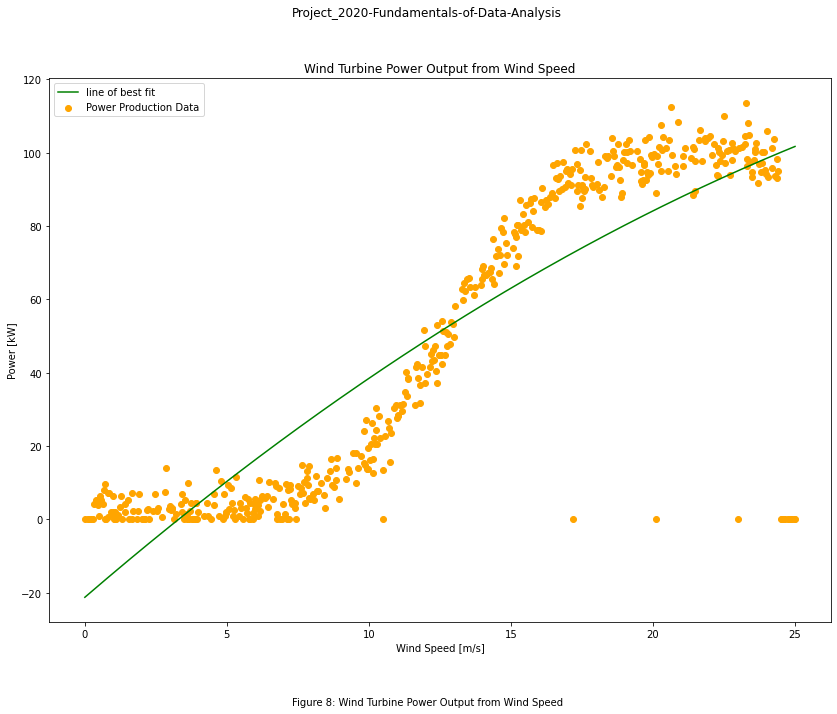

In [17]:
a = -0.07022 # the x2 value
b = 6.674 # the x1 vlue
c = -21.23 # the x0 value

windeqn_x2 = (a * wind_x**2) + (b * wind_x) + c

plt.figure(figsize=(14,10))
plt.scatter(speed, power, color = 'orange', label = 'Power Production Data')
plt.plot(speed,windeqn_x2, color = 'green', label = 'line of best fit')
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.legend()
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
txt="Figure 8: Wind Turbine Power Output from Wind Speed"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### 3.2.3) Degree of the fitting polynomial set to 2, line of best fit - power_production data set
From Figure 8 it can be seen that the line of best fit now has a slight curve. This is because the degree of the fitting polynomial is set to 2. Through visual interpretation it's hard to see much of an improvement from the linear line of best fit (polynomial set to 1). However by calculating the R-squared value it's possible to determine if the polynomial degree at 2 is a better model that the linear model. The R-squared value is calculated in the following code.

In [18]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                      # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [19]:
polyfit(speed, power,2)

{'polynomial': [-0.07021948942125415, 6.674185427445597, -21.226843909165403],
 'determination': 0.7351940425885427}

#### 3.2.4) Degree of the fitting polynomial set to 2, R-squared value - power_production data set
A function called 'polyfit' is included in the code above [17]. The function takes in the x, y and polynomial degree. It returns the coefficients and the R-squared value. The coefficients match with the coefficients determined previously using poly1d. What's interesting about the R-squared value is that it's slightly better that the linear R-squared value;

- linear R-squared = 72.89%
- polynomial R-squared value with 2 degree = 73.52%

From above it can be seen that there was very little improvement in the model after setting the polynomial degree to 2. The next step is to set the polynomial degree to 3.

*__Note:__ Before moving on, the experiment from the linear model where the power production was predicted using the model*.

 - 7.5[m/s] = actual ~8kW, linear model predicts 22.98, 2deg model predicts 24.88.
 - 17.5[m/s] = actual ~100kW, linear model predicts 72.2, 2deg model predicts 74.06. 
 
Refer to the following code for results, although the 2deg model results are closer to the actual results they are still way off for the 7.5 and 17.5[m/s] wind speed values. These results justify the necessity to re-analyse the data setting the polynomial degree to 3.

In [20]:
print(x2_poly (7.5))
print(x2_poly (17.5))

24.879700516731027
74.06668243587345


In [21]:
x3_curve = np.polyfit(speed, power, 3)
x3_poly = np.poly1d(x3_curve)
print(x3_poly)

          3         2
-0.05242 x + 1.895 x - 12.94 x + 19.2


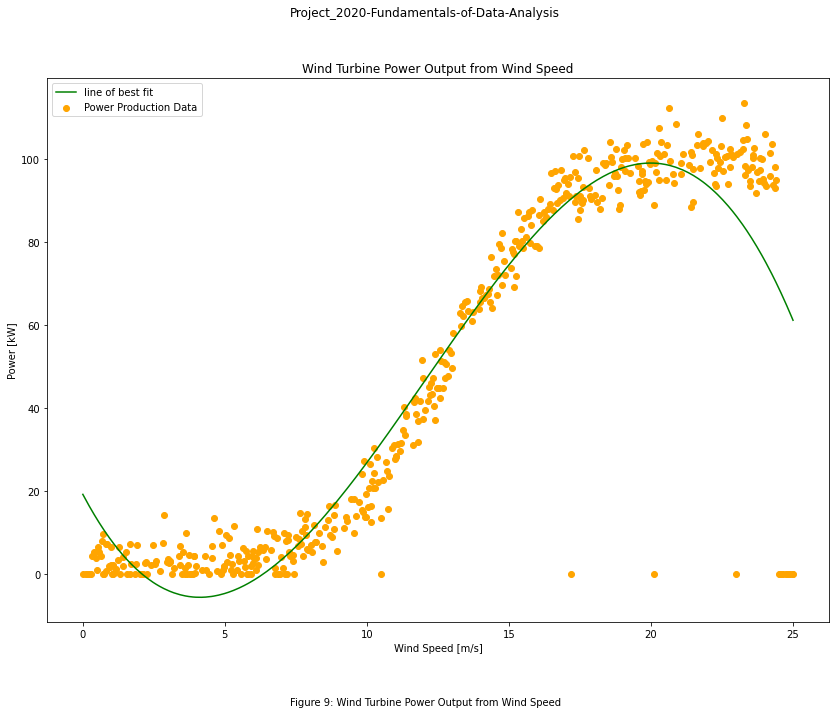

In [22]:
d = -0.0524
e = 1.8949
f = -12.943
g = 19.201

windeqn_x3 = (d * wind_x**3) + (e * wind_x**2) + (f * wind_x) + g

plt.figure(figsize=(14,10))
plt.scatter(speed, power, color = 'orange', label = 'Power Production Data')
plt.plot(speed,windeqn_x3, color = 'green', label = 'line of best fit')
plt.title("Wind Turbine Power Output from Wind Speed")
plt.suptitle("Project_2020-Fundamentals-of-Data-Analysis")
plt.legend()
plt.xlabel("Wind Speed [m/s]", color = "black")
plt.ylabel("Power [kW]", color = "black")
txt="Figure 9: Wind Turbine Power Output from Wind Speed"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### 3.2.5) Degree of the fitting polynomial set to 3, line of best fit - power_production data set
From Figure 9 it can be seen that the line of best fit now fits nicely to the data and has two curves. This is because the degree of the fitting polynomial is set to 3. Through visual interpretation it's obvious that this is the line is a good fit for the data. The R-squared value is calculated in the following code to quantify how good the line fits the data.

In [23]:
polyfit(speed, power,3)

{'polynomial': [-0.05241926693075328,
  1.894857508594477,
  -12.942858663778955,
  19.201302460410652],
 'determination': 0.8796883953739687}

#### 3.2.6) Degree of the fitting polynomial set to 3, R-squared value - power_production data set
Using the polyfit function from earlier the R-squared value is determined. The result is 87.97% which is a marked improvement on the previous two models. Out of interest the experiment from the linear model and 2deg model where the power production was predicted using the model is repeated for this 3deg model.

7.5[m/s] = actual ~8[kW], linear model predicts 22.98, 2deg model predicts 24.88., 2deg model predicts 6.60.
17.5[m/s] = actual ~100[kW], linear model predicts 72.2, 2deg model predicts 74.06., 2deg model predicts 92.06.

Refer to the following code for results. It is felt that this is a good model for the data. No further analysis is required.

In [24]:
print(x3_poly (7.5))
print(x3_poly (17.5))

6.601219104096284
92.0668791443317


## 4) Summary

## 5) Conclusion

## 6) References

[1] Scribbr; An introduction to simple linear regression; https://www.scribbr.com/statistics/simple-linear-regression/

[2] The Pennsylvania State University; What is Simple Linear Regression?; https://online.stat.psu.edu/stat462/node/91/

[3] NumPy.Org; numpy.random.randint; https://numpy.org/doc/1.19/reference/random/generated/numpy.random.randint.html?highlight=random

[4] Stony Brook University; Regression: Finding the equation of the line of best fit ;http://www.ams.sunysb.edu/~zhu/ams571/Regression.pdf

[5] https://www.statstutor.ac.uk/resources/uploaded/slregression.pdf

[6] https://scikit-learn.org/stable/modules/linear_model.html

[7] https://www.youtube.com/watch?v=8jazNUpO3lQ

[8] https://www.youtube.com/watch?v=fzZ0HO-uz1o

[9] https://note.nkmk.me/en/python-numpy-delete/

[10] Statistics By Jim; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[11] Duke University; What’s a good value for R-squared?; https://people.duke.edu/~rnau/rsquared.htm

[12] Peterson K Ozili; What is the acceptable r-squared value?; https://www.researchgate.net/post/what_is_the_acceptable_r-squared_value

[13] NumPy.Org; numpy.polyfit; https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

[14] https://www.youtube.com/watch?v=Dggl0fJJ81k; polynomial

[15] R squared for polynomial

[16] NumPy.Org; numpy.poly1d; https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

[17] stackoverflow; How do I calculate r-squared using Python and Numpy?; https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy

## End